This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  

Missing Attribute Values:
- 37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Features:

- positive examples represent people that were granted credit
- item purchased that loan is for
- people who live in a problematic region
- Amount of money on deposit in bank, Unit of currency is 10000 yen
- monthly loan payment amount, Unit of currency is 10000 yen ($70)
- number of months expected to pay off the loan
- number of years working at current company
- This is a quite discriminatory rule against feminine, but the reality of Japan presently seems so
- aged_more_60 ?s ?b)
- not (rejected_aged_unstable_work ?s)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv('/kaggle/input/dataset-lesson8/Dataset_lesson7_Credit.csv')
# Inspect data
display(df.head())
# Inspect data information
display(df.info())
# Inspect missing values in the dataset
display(df.isna().sum())
# Inspect unique value in the class
print('\n','targets: ',df['class'].unique())
print('\n','A1: ',df['A1'].unique())
# print('\n','A2: ',df['A2'].unique()) # Age feature
print('\n','A4: ',df['A4'].unique())
print('\n','A5: ',df['A5'].unique())
print('\n','A6: ',df['A6'].unique())
print('\n','A7: ',df['A7'].unique())
print('\n','A9: ',df['A9'].unique())
print('\n','A10: ',df['A10'].unique())
print('\n','A12: ',df['A12'].unique())
print('\n','A13: ',df['A13'].unique())
# print('\n','A14: ',df['A14'].unique()) 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64


 targets:  ['+' '-']

 A1:  ['b' 'a' '?']

 A4:  ['u' 'y' '?' 'l']

 A5:  ['g' 'p' '?' 'gg']

 A6:  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']

 A7:  ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']

 A9:  ['t' 'f']

 A10:  ['t' 'f']

 A12:  ['f' 't']

 A13:  ['g' 's' 'p']


### Dataset pre-processing

datase contains missing values represented with "?". we can replace this valiues with mean values for corresponding class

In [60]:
df = df.replace('?', np.NaN)
df1=df[df['class']=='+']
df2=df[df['class']=='-']

# Iterate over each column id dataset corresponding class 1
for col in df1:
    # Check if the column is of object type
    if (df1[col].dtypes == 'object'):
        # Impute with the most frequent value
        df1[col] = df1[col].fillna(df1[col].value_counts().index[0])
    else:
        df1[col] = df1[col].fillna(df1[col].mean())
        
# Iterate over each column id dataset corresponding class 2
for col in df2:
    # Check if the column is of object type
    if (df2[col].dtypes == 'object'):
        # Impute with the most frequent value
        df2[col] = df2[col].fillna(df2[col].value_counts().index[0])
    else:
        df2[col] = df2[col].fillna(df2[col].mean())

# concatenate dataframes
df_corr = pd.concat([df1, df2], axis = 0)
df_corr.head(5)


print('before correction: ',df.isnull().sum())
print('after correction: ',df_corr.isnull().sum())

before correction:  A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64
after correction:  A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64


/tmp/ipykernel_32/1593342919.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].fillna(df1[col].value_counts().index[0])
/tmp/ipykernel_32/1593342919.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].fillna(df1[col].value_counts().index[0])
/tmp/ipykernel_32/1593342919.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [61]:
df_corr.head()
df_corr['class'].unique()

array(['+', '-'], dtype=object)

In [62]:
# numeric values
df_corr['A2'] = pd.to_numeric(df_corr['A2'], errors='coerce')
df_corr['A14'] = pd.to_numeric(df_corr['A14'], errors='coerce')

# object to numeric
df_corr['A1'] = df_corr['A1'].apply(lambda x: 0 if x=='a' else 1)
df_corr['A9'] = df_corr['A9'].apply(lambda x: 0 if x=='t' else 1)
df_corr['A10'] = df_corr['A10'].apply(lambda x: 0 if x=='t' else 1)
df_corr['A12'] = df_corr['A12'].apply(lambda x: 0 if x=='t' else 1)
df_corr['class'] = df_corr['class'].apply(lambda x: 0 if x=='+' else 1)

df_corr['A4']= pd.factorize(df_corr['A4'])[0] + 1
df_corr['A5']= pd.factorize(df_corr['A5'])[0] + 1
df_corr['A6']= pd.factorize(df_corr['A6'])[0] + 1
df_corr['A7']= pd.factorize(df_corr['A7'])[0] + 1
df_corr['A13']= pd.factorize(df_corr['A13'])[0] + 1


# new features
df_corr['A16'] = df_corr['A2'].apply(lambda value: (1 if value <= 18 else 2) if value <= 30 else 3)
df_corr['A17'] = df_corr['A14'].apply(lambda value: (1 if value <= 250 else 2) if value <= 400 else 3)
display(df_corr)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class,A16,A17
0,1,30.83,0.000,1,1,1,1,1.25,0,0,1,1,1,202,0,0,3,1
1,0,58.67,4.460,1,1,2,2,3.04,0,0,6,1,1,43,560,0,3,1
2,0,24.50,0.500,1,1,2,2,1.50,0,1,0,1,1,280,824,0,2,2
3,1,27.83,1.540,1,1,1,1,3.75,0,0,5,0,1,100,3,0,2,1
4,1,20.17,5.625,1,1,1,1,1.71,0,1,0,1,2,120,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,11,2,1.25,1,1,0,1,1,260,0,1,2,2
686,0,22.67,0.750,1,1,7,1,2.00,1,0,2,0,1,200,394,1,2,1
687,0,25.25,13.500,2,2,13,4,2.00,1,0,1,0,1,200,1,1,2,1
688,1,17.92,0.205,1,1,12,1,0.04,1,1,0,1,1,280,750,1,1,2


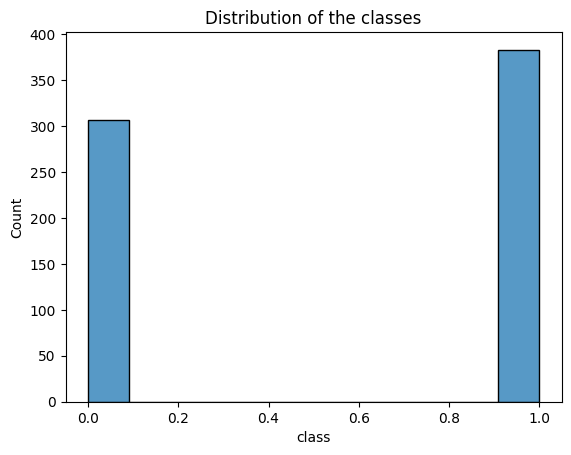

In [63]:
ax = sns.histplot(data=df_corr, x="class")
ax.set_title(f"Distribution of the classes")
plt.show()

In [75]:
# Import train_test_split
from sklearn.model_selection import train_test_split

y = df_corr['class'].values
X = df_corr.drop(['class'], axis=1).values
print(X.shape)
print(y.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

(690, 17)
(690,)


In [76]:
# Dataset normalization
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test feature_range
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

model = DecisionTreeClassifier()
model.max_depth = 100
# Training the basic Decision Tree model with training set 
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


a2 = accuracy_score(y_test,y_pred)
f2 = f1_score(y_test, y_pred, average="macro")
p2 = precision_score(y_test, y_pred, average="macro")
r2 = recall_score(y_test, y_pred, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# print confusion matrix
print('Confusion matrix:\n', cnf_matrix)


accuracy score :  0.8057851239669421
f1 score :  0.8057021814516818
precision score :  0.8057851239669422
recall score :  0.8063081554460865
Confusion matrix:
 [[ 95  21]
 [ 26 100]]


# Conclusion

- missing values were replaced with mean value calculated using corresponding class values
- dataset classes are balanced
- smaller validation dataset - smaller accuracy